In [8]:
#Import libraries
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import norm
from scipy import stats
import scipy as sp
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 300)

In [9]:
df = pd.read_csv('list_working.csv',index_col=0)
test = pd.read_csv('final.csv',index_col=0)

In [10]:
dummies_prop = pd.get_dummies(test['property_type'], drop_first=True)
dummies_room= pd.get_dummies(test['room_type'], drop_first=True)
test = pd.concat([test, dummies_room, dummies_prop],axis=1)
test.drop(['property_type','room_type'],axis = 1,inplace = True)

In [6]:
%run -i 'MakeModel.py'
%run -i 'MakeModels2.py'

In [11]:
test_tgt = test.price
test_feat = test.drop(['price'], axis=1)
test_feat.head()
test_feat.columns

Index(['host_response_rate', 'host_is_superhost', 'host_total_listings_count',
       'neighbourhood_cleansed', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'guests_included', 'extra_people', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable',
       'Private room', 'Condominium', 'Guest suite', 'House'],
      dtype='object')

In [4]:
df_tgt = df.price
df_feat = df.drop(['price'], axis=1)
df_feat.head()
df_feat.columns

Index(['host_response_rate', 'host_is_superhost', 'host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'guests_included', 'extra_people', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable',
       'room_Private room', 'nbrhd_Bernal Heights',
       'nbrhd_Castro/Upper Market', 'nbrhd_Chinatown', 'nbrhd_Crocker Amazon',
       'nbrhd_Diamond Heights', 'nbrhd_Downtown/Civic Center',
       'nbrhd_Excelsior', 'nbrhd_Financial District', 'nbrhd_Glen Park',
       'nbrhd_Golden Gate Park', 'nbrhd_Haight Ashbury',
       'nbrhd_Inner Richmond', 'nbrhd_Inner Sunset', 'nbrhd_Lakeshore',
       'nbrhd_Marina', 'nbrhd_Mission', 'nbrhd_Nob Hill', 'nbrhd_Noe Valley',
       'nbrhd_North Beach', 'nbrhd_Ocean View', 'nbrhd_Outer Mission',
       'nbrhd_Outer Richmond', 'nbrhd_Outer Sunset', 'nbrhd_Pacific Heights',
       'nbrhd_Parkside', 'nbrhd_Potrero Hill', 'nbrhd_Presidio',
       'nbrhd_Presid

## Splitting into feature and target

In [18]:
df_tgt = df.price
df_feat2 = df[['host_response_rate', 'host_is_superhost', 'host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'guests_included', 'extra_people', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable',
       'room_Private room','prop_Condominium', 'prop_Guest suite', 'prop_House']]
df_feat2.head()
#dropping host response rate
df_feat3 = df[['host_is_superhost', 'host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'guests_included', 'extra_people', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable',
       'room_Private room','prop_Condominium', 'prop_Guest suite', 'prop_House']]
df_feat3.head()
#dropping superhost and instant booking
df_feat4 = df[['host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'guests_included', 'extra_people', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating',
       'room_Private room','prop_Condominium', 'prop_Guest suite', 'prop_House']]
df_feat4.head()
#dropping extra people cost
df_feat5 = df[['host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'guests_included', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating',
       'room_Private room','prop_Condominium', 'prop_Guest suite', 'prop_House']]
test_feat2 = test[['host_total_listings_count','neighbourhood_cleansed', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'guests_included', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating',
       'Private room','Condominium', 'Guest suite', 'House']]
df_feat5.head()
#dropping beds
df_feat6 = df[['host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
    'guests_included', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating',
       'room_Private room','prop_Condominium', 'prop_Guest suite', 'prop_House']]
df_feat6.head()

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,review_scores_rating,room_Private room,prop_Condominium,prop_Guest suite,prop_House
0,1.0,37.76931,-122.43386,3,1.0,1.0,2,1,217,97.0,0,0,0,0
1,2.0,37.75402,-122.45805,2,1.0,1.0,2,1,160,94.0,1,0,0,1
2,2.0,37.74511,-122.42102,5,1.0,2.0,2,30,111,98.0,0,0,0,0
3,10.0,37.76669,-122.45250,2,4.0,1.0,1,32,18,86.0,1,0,0,0
4,10.0,37.76487,-122.45183,2,4.0,1.0,1,32,8,93.0,1,0,0,0


({'ridge': RidgeCV(alphas=array([1.e-15, 1.e-10, 1.e-08, 1.e-04, 1.e-03, 1.e-02, 1.e+00, 5.e+00,
         1.e+01, 2.e+01]),
          cv=20, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
          store_cv_values=False)},
 {'ridge_train_rmse': 82.77566983220015,
  'ridge_test_rmse': 90.14448784798088,
  'ridge_test_r2': 0.6463045446902287,
  'ridge_train_r2': 0.6540070611875946})

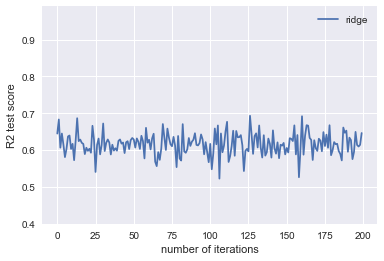

In [86]:

make_models(df_feat2, df_tgt, num_iter=100, models=['ridge'], complexity='poly_intx', degree=2)



({'ridge': RidgeCV(alphas=array([1.e-15, 1.e-10, 1.e-08, 1.e-04, 1.e-03, 1.e-02, 1.e+00, 5.e+00,
         1.e+01, 2.e+01]),
          cv=20, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
          store_cv_values=False)},
 {'ridge_train_rmse': 83.37206120460215,
  'ridge_test_rmse': 88.05818487244119,
  'ridge_test_r2': 0.6638899176151504,
  'ridge_train_r2': 0.6484686353164537})

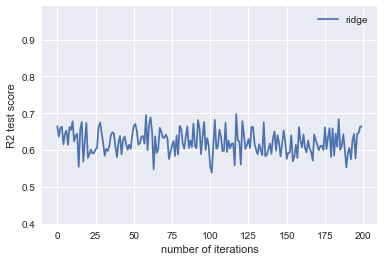

In [87]:

make_models(df_feat3, df_tgt, num_iter=100, models=['ridge'], complexity='poly_intx', degree=2)


({'ridge': RidgeCV(alphas=array([1.e-15, 1.e-10, 1.e-08, 1.e-04, 1.e-03, 1.e-02, 1.e+00, 5.e+00,
         1.e+01, 2.e+01]),
          cv=20, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
          store_cv_values=False)},
 {'ridge_train_rmse': 84.31737349740018,
  'ridge_test_rmse': 88.63641157596643,
  'ridge_test_r2': 0.6161929007284932,
  'ridge_train_r2': 0.6517787073988981})

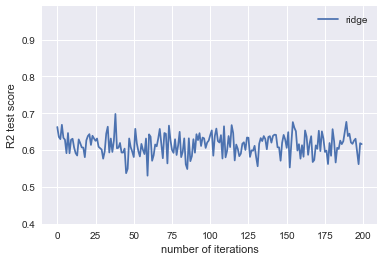

In [88]:

make_models(df_feat4, df_tgt, num_iter=100, models=['ridge'], complexity='poly_intx', degree=2)


({'lasso': LassoCV(alphas=[1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20],
          copy_X=True, cv='warn', eps=0.001, fit_intercept=True, max_iter=1000,
          n_alphas=100, n_jobs=None, normalize=False, positive=False,
          precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
          verbose=False)},
 {'lasso_train_rmse': 89.58283519770185,
  'lasso_test_rmse': 81.45960000204298,
  'lasso_test_r2': 0.6717248363994202,
  'lasso_train_r2': 0.608443901546063})

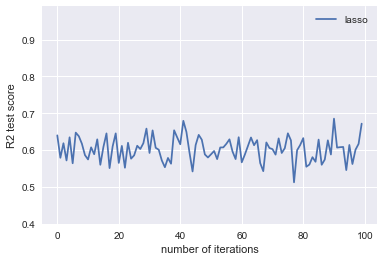

In [24]:

make_models(df_feat2, df_tgt, num_iter=100, models=['lasso'], complexity='poly_intx', degree=2)


({'lasso': LassoCV(alphas=[1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20],
          copy_X=True, cv=20, eps=0.001, fit_intercept=True, max_iter=1000,
          n_alphas=100, n_jobs=None, normalize=False, positive=False,
          precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
          verbose=False)},
 {'lasso_train_rmse': 88.75091795330569,
  'lasso_test_rmse': 88.82730644190751,
  'lasso_test_r2': 0.6336238590122556,
  'lasso_train_r2': 0.6090088134437168})

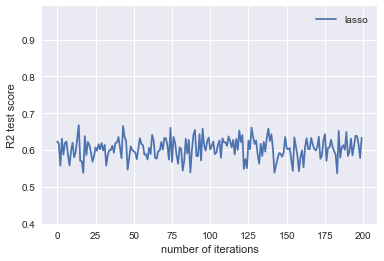

In [90]:

make_models(df_feat4, df_tgt, num_iter=100, models=['lasso'], complexity='poly_intx', degree=2)


({'ridge': RidgeCV(alphas=array([1.e-15, 1.e-10, 1.e-08, 1.e-04, 1.e-03, 1.e-02, 1.e+00, 5.e+00,
         1.e+01, 2.e+01]),
          cv=20, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
          store_cv_values=False)},
 {'ridge_train_rmse': 83.89322107537414,
  'ridge_test_rmse': 92.71832647065247,
  'ridge_test_r2': 0.5803850641389914,
  'ridge_train_r2': 0.6554900520861316})

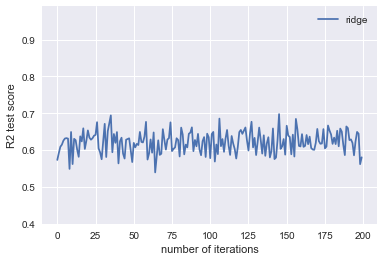

In [92]:

make_models(df_feat5, df_tgt, num_iter=100, models=['ridge'], complexity='poly_intx', degree=2)


({'lasso': LassoCV(alphas=[1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20],
          copy_X=True, cv=20, eps=0.001, fit_intercept=True, max_iter=1000,
          n_alphas=100, n_jobs=None, normalize=False, positive=False,
          precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
          verbose=False)},
 {'lasso_train_rmse': 87.88772884102495,
  'lasso_test_rmse': 88.09991988771444,
  'lasso_test_r2': 0.6310473786147124,
  'lasso_train_r2': 0.619228078309529})

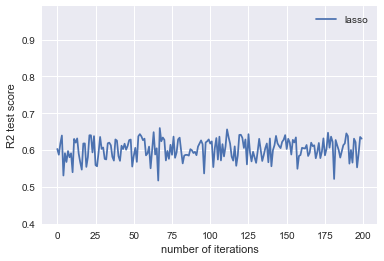

In [93]:

make_models(df_feat5, df_tgt, num_iter=100, models=['lasso'], complexity='poly_intx', degree=2)


({'enet': ElasticNetCV(alphas=[1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20],
               copy_X=True, cv=20, eps=0.001, fit_intercept=True,
               l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0], max_iter=1000,
               n_alphas=100, n_jobs=None, normalize=False, positive=False,
               precompute='auto', random_state=None, selection='cyclic',
               tol=0.0001, verbose=0)},
 {'enet_train_rmse': 85.88813697660134,
  'enet_test_rmse': 97.22376199401852,
  'enet_test_r2': 0.5710959855680513,
  'enet_train_r2': 0.6318797069050426})

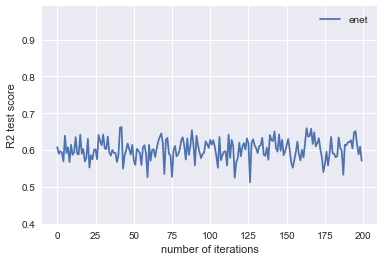

In [94]:

make_models(df_feat5, df_tgt, num_iter=100, models=['enet'], complexity='poly_intx', degree=2)


({'ridge': RidgeCV(alphas=array([1.e-15, 1.e-10, 1.e-08, 1.e-04, 1.e-03, 1.e-02, 1.e+00, 5.e+00,
         1.e+01, 2.e+01]),
          cv=20, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
          store_cv_values=False)},
 {'ridge_train_rmse': 83.59200144108027,
  'ridge_test_rmse': 94.2854626800398,
  'ridge_test_r2': 0.6220535008136834,
  'ridge_train_r2': 0.6447499205328211})

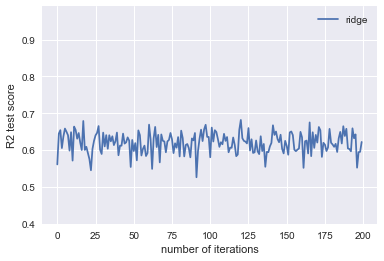

In [96]:

make_models(df_feat6, df_tgt, num_iter=100, models=['ridge'], complexity='poly_intx', degree=2)


({'ols': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)},
 {'ols_train_rmse': 85.17842531129097,
  'ols_test_rmse': 86.96540159173125,
  'ols_test_r2': 0.6557186050915819,
  'ols_train_r2': 0.6382691669442309})

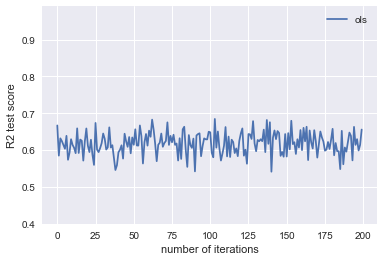

In [6]:

make_models(df_feat5, df_tgt, num_iter=100, models=['ols'], complexity='poly_intx', degree=2)


({'ols': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)},
 {'ols_train_rmse': 85.60783177543786,
  'ols_test_rmse': 89.21022183000412,
  'ols_test_r2': 0.6109110902375494,
  'ols_train_r2': 0.6413557080683797})

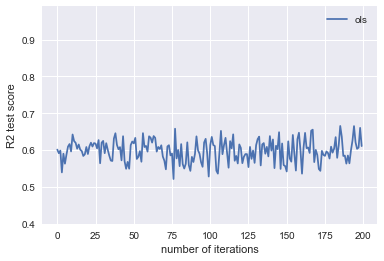

In [12]:

make_models(test_feat, test_tgt, num_iter=100, models=['ols'], complexity='poly_intx', degree=2)


({'lasso': LassoCV(alphas=[1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20],
          copy_X=True, cv=20, eps=0.001, fit_intercept=True, max_iter=1000,
          n_alphas=100, n_jobs=None, normalize=False, positive=False,
          precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
          verbose=False)},
 {'lasso_train_rmse': 85.92631256437129,
  'lasso_test_rmse': 88.77964775482987,
  'lasso_test_r2': 0.5784858483960232,
  'lasso_train_r2': 0.6463298829308859})

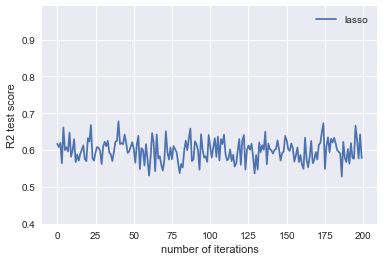

In [13]:

make_models(test_feat, test_tgt, num_iter=100, models=['lasso'], complexity='poly_intx', degree=2)


({'lasso': LassoCV(alphas=[1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20],
          copy_X=True, cv=20, eps=0.001, fit_intercept=True, max_iter=1000,
          n_alphas=100, n_jobs=None, normalize=False, positive=False,
          precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
          verbose=False)},
 {'lasso_train_rmse': 88.26051190422231,
  'lasso_test_rmse': 87.48659843792647,
  'lasso_test_r2': 0.6084681967569482,
  'lasso_train_r2': 0.6230143456131274})

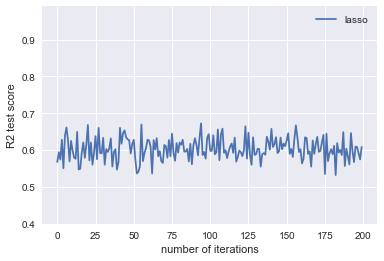

In [19]:

make_models(test_feat2, test_tgt, num_iter=100, models=['lasso'], complexity='poly_intx', degree=2)


({'ridge': RidgeCV(alphas=array([1.e-15, 1.e-10, 1.e-08, 1.e-04, 1.e-03, 1.e-02, 1.e+00, 5.e+00,
         1.e+01, 2.e+01]),
          cv=20, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
          store_cv_values=False)},
 {'ridge_train_rmse': 87.37580014484315,
  'ridge_test_rmse': 91.956145034071,
  'ridge_test_r2': 0.5745789157893855,
  'ridge_train_r2': 0.6290234094201779})

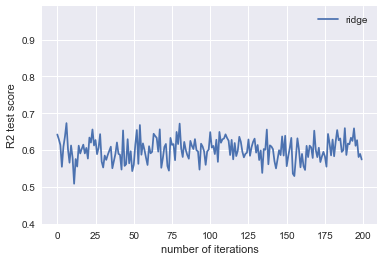

In [20]:

make_models(test_feat2, test_tgt, num_iter=100, models=['ridge'], complexity='poly_intx', degree=2)
